In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = (15, 15)
seed = 1337
np.random.seed(seed)
torch.manual_seed(seed)


In [2]:
# don't touch this cell once it's started running
exp_df = pd.read_csv('./mesa/exp_filtered.csv')  # gene expression matrix 
geno_df = pd.read_csv('./mesa/geno_filtered.csv')  # genotype matrix 
methyl_df = pd.read_csv('./mesa/meth_filtered.csv') # methylation matrix 
meta_df = pd.read_csv('./mesa/sample_info.csv')  # sample information 

In [3]:
exp_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V39691,V39692,V39693,V39694,V39695,V39696,V39697,V39698,V39699,V39700
0,0.283231,-0.038014,0.093034,0.132120,-0.374429,-0.552184,-0.252427,-0.444679,-1.017930,-0.098002,...,-0.527039,-0.394202,-0.440265,-0.512296,-0.550929,-0.301533,-0.518743,-0.408676,-0.559200,-0.530112
1,-1.297379,-0.038014,-0.965177,1.475603,0.484060,0.838883,0.266593,1.385203,3.547907,0.577966,...,-0.527039,-0.394202,-0.440265,-0.512296,-0.550929,-0.301533,-0.518743,-0.408676,-0.559200,-0.530112
2,-0.358892,-0.038014,0.787587,-0.679811,0.267634,-0.429473,-0.634863,-0.301782,0.582332,-0.252436,...,-0.527039,-0.394202,-0.440265,-0.507987,-0.550929,-0.301533,-0.518743,-0.408676,-0.528848,-0.529639
3,0.382019,-0.038014,-1.619324,-0.662287,-1.124706,-1.013847,-0.599742,-1.190922,0.008013,-1.054990,...,-0.527039,-0.394202,-0.440265,-0.512296,-0.550929,-0.301533,-0.518743,-0.408676,-0.559200,-0.530112
4,-0.358892,-0.038014,1.293213,0.330722,-0.215717,1.043151,-0.576327,2.133430,1.582169,0.253907,...,-0.527039,-0.394202,-0.440265,-0.512296,-0.550929,-0.301533,-0.518743,-0.408676,-0.559200,-0.530112


In [4]:
geno_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.001853,0.001670,0.003581,-0.000484,-0.000445,0.000372,-0.000028,-0.000386,0.003551,-0.002468,0.001420
1,0.001011,0.011850,-0.008824,0.006497,-0.002953,0.000815,-0.001188,-0.001805,0.000498,-0.000436,0.000494
2,0.001015,0.011948,-0.008651,0.007578,-0.003458,0.001331,-0.001180,-0.001819,0.000687,-0.000203,0.000448
3,0.001776,0.003903,0.006477,-0.000466,-0.000097,-0.002511,0.003514,-0.001574,0.004547,-0.003356,0.002293
4,0.002301,-0.001520,-0.000794,0.001003,0.001446,-0.002887,0.003605,0.000644,-0.014159,-0.007493,0.000699


In [5]:
methyl_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V99991,V99992,V99993,V99994,V99995,V99996,V99997,V99998,V99999,V100000
0,0.809480,0.639355,-0.491277,-0.561057,-0.510674,0.626588,0.004762,-0.437520,1.065879,-0.579707,...,0.441998,0.510226,0.328076,0.897492,-0.155814,-0.576441,0.249123,0.083987,1.064381,0.965958
1,0.053048,0.845273,-0.395192,-0.064189,-1.231897,0.754221,-0.679740,-0.588373,0.787193,3.625033,...,0.161684,2.026966,0.201084,0.875056,-1.745232,-0.212363,-1.186377,1.187697,0.226463,-1.605972
2,0.115059,-0.259010,1.262238,0.405718,0.772703,-1.256757,-0.470474,-0.090751,-0.514142,1.459285,...,0.355066,-1.214874,0.098366,-0.202486,-0.741779,0.357895,1.121839,-0.259045,0.000000,-1.089265
3,-0.032968,-1.641915,-0.243780,0.159828,-0.606788,0.935429,0.894654,-0.685114,0.526505,0.360063,...,0.089665,-0.055880,0.228288,-0.429975,0.217926,-0.710591,-0.934514,0.406942,-1.197796,-0.950568
4,0.334678,2.576427,-0.132341,0.604277,0.089598,0.860018,-0.243208,-0.554348,0.287739,0.174725,...,0.581278,1.834557,0.752870,1.247209,0.996214,-0.119410,-0.407896,1.028559,1.456523,-0.298734


In [6]:
meta_df.head()

,NWDID,Sex,Race,m_Bcell,m_CD4T,m_CD8T,m_Mono,m_Neu,m_NK,m_Sample_Well,...,e_Macrophages,e_Dendritic cells,e_Mast cells,e_Eosinophils,e_Neutrophils,e_3p_bias,e_RQS,e_adapter_contam_pct,e_lc_sets,e_seq_center
0,NWD101761,female,hispanic,0.068842,0.166733,0.025413,0.071139,0.544120,0.156126,A08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27-51547,UW
1,NWD102115,female,chinese,0.063453,0.089556,0.005323,0.084983,0.646707,0.138551,B07,...,0.011329,0.0,0.023574,0.0,0.0,NaN,NaN,NaN,27-55381,UW
2,NWD103295,male,chinese,0.102671,0.171318,0.044048,0.096056,0.402556,0.242089,F01,...,0.002587,0.0,0.012609,0.0,0.0,0.3,6.823964,0.01,"LCSET-11046,LCSET-11523",Broad
3,NWD103974,male,hispanic,0.102971,0.250660,0.058481,0.073019,0.399163,0.135097,E09,...,0.009513,0.0,0.013991,0.0,0.0,NaN,NaN,NaN,27-55381,UW
4,NWD104274,male,white,0.046387,0.176384,0.000000,0.078150,0.581815,0.149888,E02,...,0.012812,0.0,0.030065,0.0,0.0,NaN,NaN,NaN,27-51796,UW


In [7]:
# need to run PCA on the expression and methylation DFs 
# check the expression and methylation DFs have 0-mean and unit variance
print(exp_df.mean(axis=0))
print(exp_df.std(axis=0))
print(methyl_df.mean(axis=0))
print(methyl_df.std(axis=0))

V1        3.138546e-17
V2       -2.005461e-20
V3        3.457414e-16
V4       -1.307560e-16
V5       -2.887863e-17
              ...     
V39696    3.040278e-17
V39697    2.780371e-16
V39698    1.648489e-16
V39699    2.808447e-16
V39700   -1.389383e-16
Length: 39700, dtype: float64
V1        1.0
V2        1.0
V3        1.0
V4        1.0
V5        1.0
         ... 
V39696    1.0
V39697    1.0
V39698    1.0
V39699    1.0
V39700    1.0
Length: 39700, dtype: float64
V1         5.623312e-16
V2        -6.327629e-16
V3         2.952038e-17
V4         1.569072e-16
V5        -3.016213e-16
               ...     
V99996     5.559137e-17
V99997     6.930872e-17
V99998    -1.400614e-16
V99999    -2.455486e-16
V100000   -1.920830e-16
Length: 100000, dtype: float64
V1         1.0
V2         1.0
V3         1.0
V4         1.0
V5         1.0
          ... 
V99996     1.0
V99997     1.0
V99998     1.0
V99999     1.0
V100000    1.0
Length: 100000, dtype: float64


In [8]:
# need to compute the SVD of each matrix 
exp_np = exp_df.to_numpy()
methyl_np = methyl_df.to_numpy()
print('expression shape: {} methylation shape: {}'.format(exp_np.shape, methyl_np.shape))

expression shape: (692, 39700) methylation shape: (692, 100000)


In [9]:
# fit gene expression PCA
# nearly every PC seems to clear the marchenko-pastur lower bound
n, m = exp_np.shape
mp_lower_bound = (1 + np.sqrt(m / n)) ** 2
exp_pca_model = PCA()
exp_pca_model.fit(exp_np)

to_keep = exp_pca_model.explained_variance_ > mp_lower_bound

print('Keeping {} PCs Explaining {:.2f}\% Of Variance'.format(np.sum(to_keep), np.sum(exp_pca_model.explained_variance_ratio_[to_keep])*100))
exp_pca_model = PCA(n_components=np.sum(to_keep))
exp_np_pcs = exp_pca_model.fit_transform(exp_np)
print('Shape After PCA: {}'.format(exp_np_pcs.shape))

Keeping 44 PCs Explaining 39.25\% Of Variance
Shape After PCA: (692, 44)


In [10]:
# fit gene expression PCA
n_pcs = 50

# a bit problematic: every PC seems to clear the pasteur-lower bound
n, m = methyl_np.shape
mp_lower_bound = (1 + np.sqrt(m / n)) ** 2 
methyl_pca_model = PCA()
methyl_pca_model.fit(methyl_np)

to_keep = methyl_pca_model.explained_variance_ > mp_lower_bound

print('Keeping {} PCs Explaining {:.2f}\% Of Variance'.format(np.sum(to_keep), np.sum(methyl_pca_model.explained_variance_ratio_[to_keep])*100))
methyl_pca_model = PCA(n_components=np.sum(to_keep))
methyl_np_pcs = methyl_pca_model.fit_transform(methyl_np)
print('Shape After PCA: {}'.format(methyl_np_pcs.shape))


Keeping 47 PCs Explaining 54.82\% Of Variance
Shape After PCA: (692, 47)


In [11]:
import torch
import importlib
import model
import matplotlib.pyplot as plt
importlib.reload(model)

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    print('gpu available: using {}'.format(device))

# current datasets: 
# methyl_np_pcs (n_samples x n_pc_features)
# exp_np_pcs (n_samples x n_pc_features)
# geno_np (n_samples x n_pc_features)
geno_np = geno_df.to_numpy()

# create tensor datasets
geno_np = torch.tensor(geno_np)
methyl_np_pcs = torch.tensor(methyl_np_pcs)
exp_np_pcs = torch.tensor(exp_np_pcs)

# initialize dataset dimension parameters 
x_dims = torch.tensor([4, 4, 4])  # low dimensional private structure
y_dims = torch.tensor([methyl_np_pcs.shape[1], exp_np_pcs.shape[1], geno_np.shape[1]])
d = 5  # low dimensional shared structure
N = 1000

# data preparation for model fitting
datasets = [methyl_np_pcs, exp_np_pcs, geno_np]
y_concat = torch.cat(datasets, axis=1).double()
y_concat_T = y_concat.T.double()

# use W_model, L_model, Phi_model
W_model, L_model, Phi_model = model.fit_model(y_dims, x_dims, datasets, d, y_concat, geno_np.shape[0], steps=N, device=device)
W_model = W_model.cpu()
L_model = L_model.cpu()
Phi_model = Phi_model.cpu()

gpu available: using cuda
0/1000: (Wtprime-Wt)_F: 37017.44932240352 (Ltprime-Lt)_F: 12.308917811787923 (Phi_tprime-Phi_t)_F: 67.94690521348895
100/1000: (Wtprime-Wt)_F: 2.8221281393374977 (Ltprime-Lt)_F: 0.12192628730502014 (Phi_tprime-Phi_t)_F: 6.780903883955618
200/1000: (Wtprime-Wt)_F: 0.8380381295468975 (Ltprime-Lt)_F: 0.02151498640016997 (Phi_tprime-Phi_t)_F: 1.1959351051287563
300/1000: (Wtprime-Wt)_F: 0.40884142695125025 (Ltprime-Lt)_F: 0.02998779967836038 (Phi_tprime-Phi_t)_F: 0.6101579158233637
400/1000: (Wtprime-Wt)_F: 0.9381325892006586 (Ltprime-Lt)_F: 0.03222668311846025 (Phi_tprime-Phi_t)_F: 0.3184155346183598
500/1000: (Wtprime-Wt)_F: 162.2226107128221 (Ltprime-Lt)_F: 0.2592310067461926 (Phi_tprime-Phi_t)_F: 4.015223358342057
600/1000: (Wtprime-Wt)_F: 78.35267458000484 (Ltprime-Lt)_F: 0.20617718884061445 (Phi_tprime-Phi_t)_F: 2.2175818921541675
700/1000: (Wtprime-Wt)_F: 428.73768678106654 (Ltprime-Lt)_F: 0.2402346592611655 (Phi_tprime-Phi_t)_F: 6.729548676642033
800/1000:

<Figure size 1080x1080 with 0 Axes>

In [12]:
importlib.reload(model)
# project into the latent space
posterior_z, posterior_x = model.project_latent(W_model, L_model, Phi_model, d, y_concat, x_dims)

# compute the posterior z conditioned on only the data from a given dataset
posterior_z_methyl, posterior_x_methyl = model.project_latent_individual(W_model, L_model, Phi_model, d, y_concat, x_dims, y_dims, 0)
posterior_z_exp, posterior_x_exp = model.project_latent_individual(W_model, L_model, Phi_model, d, y_concat, x_dims, y_dims, 1)
posterior_z_geno, posterior_x_geno = model.project_latent_individual(W_model, L_model, Phi_model, d, y_concat, x_dims, y_dims, 2)

# get the interset correlation as per Parra 2018
rho, rb, rw = model.compute_ISC(posterior_z_methyl, posterior_z_exp, posterior_z_geno)

Using Coords [3 2]
ISC: tensor([0.4408, 0.4197, 0.6992, 0.6139, 0.5112])


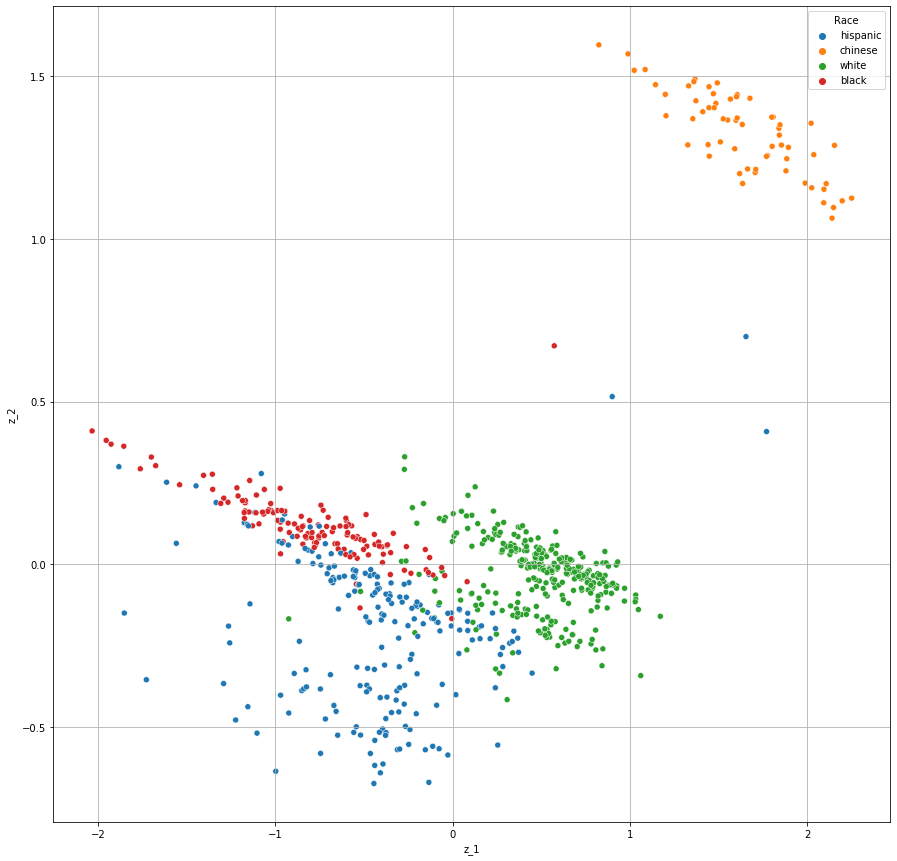

In [13]:
# # add in meta dataframe
posterior_z_2 = posterior_z[:, np.argsort(rho.numpy())[-2:]]
print("Using Coords {}".format(np.argsort(rho.numpy())[-2:]))
print("ISC: {}".format(rho))
meta_df['z_1'] = posterior_z_2[:, 0]
meta_df['z_2'] = posterior_z_2[:, 1]
column = 'Race'

meta = meta_df[column].unique()
fig = sns.scatterplot(data=meta_df[['z_1', 'z_2', column]], x='z_1', y='z_2', hue=column, hue_order=meta)
plt.grid()

In [14]:
xmu_methyl_cov, xmu_methyl_var = model.compute_x_cov(posterior_x_methyl)
xmu_geno_cov, xmu_geno_var = model.compute_x_cov(posterior_x_geno)
xmu_exp_cov, xmu_exp_var = model.compute_x_cov(posterior_x_exp)


In [15]:
meta_df['methyl_x1'] = posterior_x_methyl[:, np.argsort(xmu_methyl_var.numpy())[-1]]
meta_df['methyl_x2'] = posterior_x_methyl[:, np.argsort(xmu_methyl_var.numpy())[-2]]

meta_df['geno_x1'] = posterior_x_geno[:, np.argsort(xmu_geno_var.numpy())[-1]]
meta_df['geno_x2'] = posterior_x_geno[:, np.argsort(xmu_geno_var.numpy())[-2]]

meta_df['exp_x1'] = posterior_x_exp[:, np.argsort(xmu_exp_var.numpy())[-1]]
meta_df['exp_x2'] = posterior_x_exp[:, np.argsort(xmu_exp_var.numpy())[-2]]

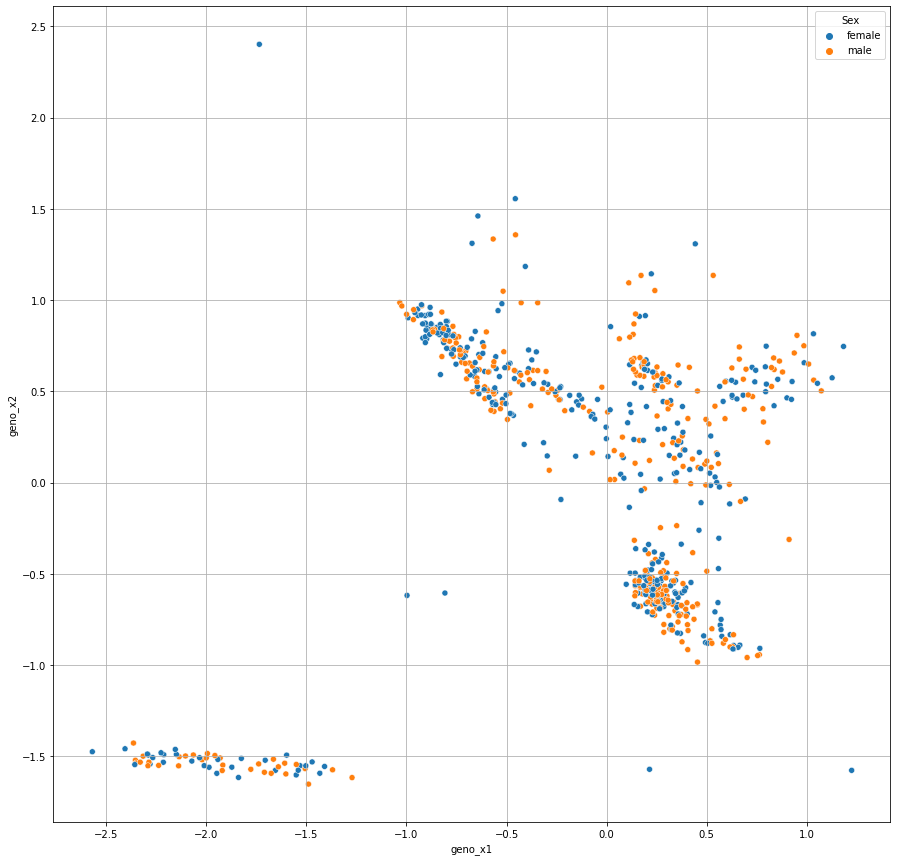

In [16]:
column = 'Sex'
meta = meta_df[column].unique()
sns.scatterplot(data=meta_df[['geno_x1', 'geno_x2', column]], x='geno_x1', y='geno_x2', hue=column, hue_order=meta, legend='full')
plt.grid()

In [17]:
n_columns = len(meta_df.columns)
all_cols = meta_df.columns
column_list = []
max_categories = 15
for col in meta_df.columns:
    print('col: {} unique: {}'.format(col, len(meta_df[col].unique())))
    if len(meta_df[col].unique()) < max_categories:
        column_list.append(col)
print(len(column_list))

col: NWDID unique: 692
col: Sex unique: 2
col: Race unique: 4
col: m_Bcell unique: 686
col: m_CD4T unique: 685
col: m_CD8T unique: 485
col: m_Mono unique: 689
col: m_Neu unique: 690
col: m_NK unique: 685
col: m_Sample_Well unique: 90
col: m_Sample_Plate unique: 21
col: m_Sentrix_Position unique: 8
col: m_Batch_scan unique: 7
col: m_Batch unique: 20
col: m_Summary.batch unique: 5
col: m_age unique: 40
col: e_B cells unique: 591
col: e_Plasma cells unique: 526
col: e_T cells unique: 590
col: e_NK cells unique: 588
col: e_Monocytes unique: 590
col: e_Macrophages unique: 584
col: e_Dendritic cells unique: 227
col: e_Mast cells unique: 583
col: e_Eosinophils unique: 27
col: e_Neutrophils unique: 93
col: e_3p_bias unique: 29
col: e_RQS unique: 340
col: e_adapter_contam_pct unique: 8
col: e_lc_sets unique: 51
col: e_seq_center unique: 2
col: z_1 unique: 692
col: z_2 unique: 692
col: methyl_x1 unique: 692
col: methyl_x2 unique: 692
col: geno_x1 unique: 692
col: geno_x2 unique: 692
col: exp_x1 

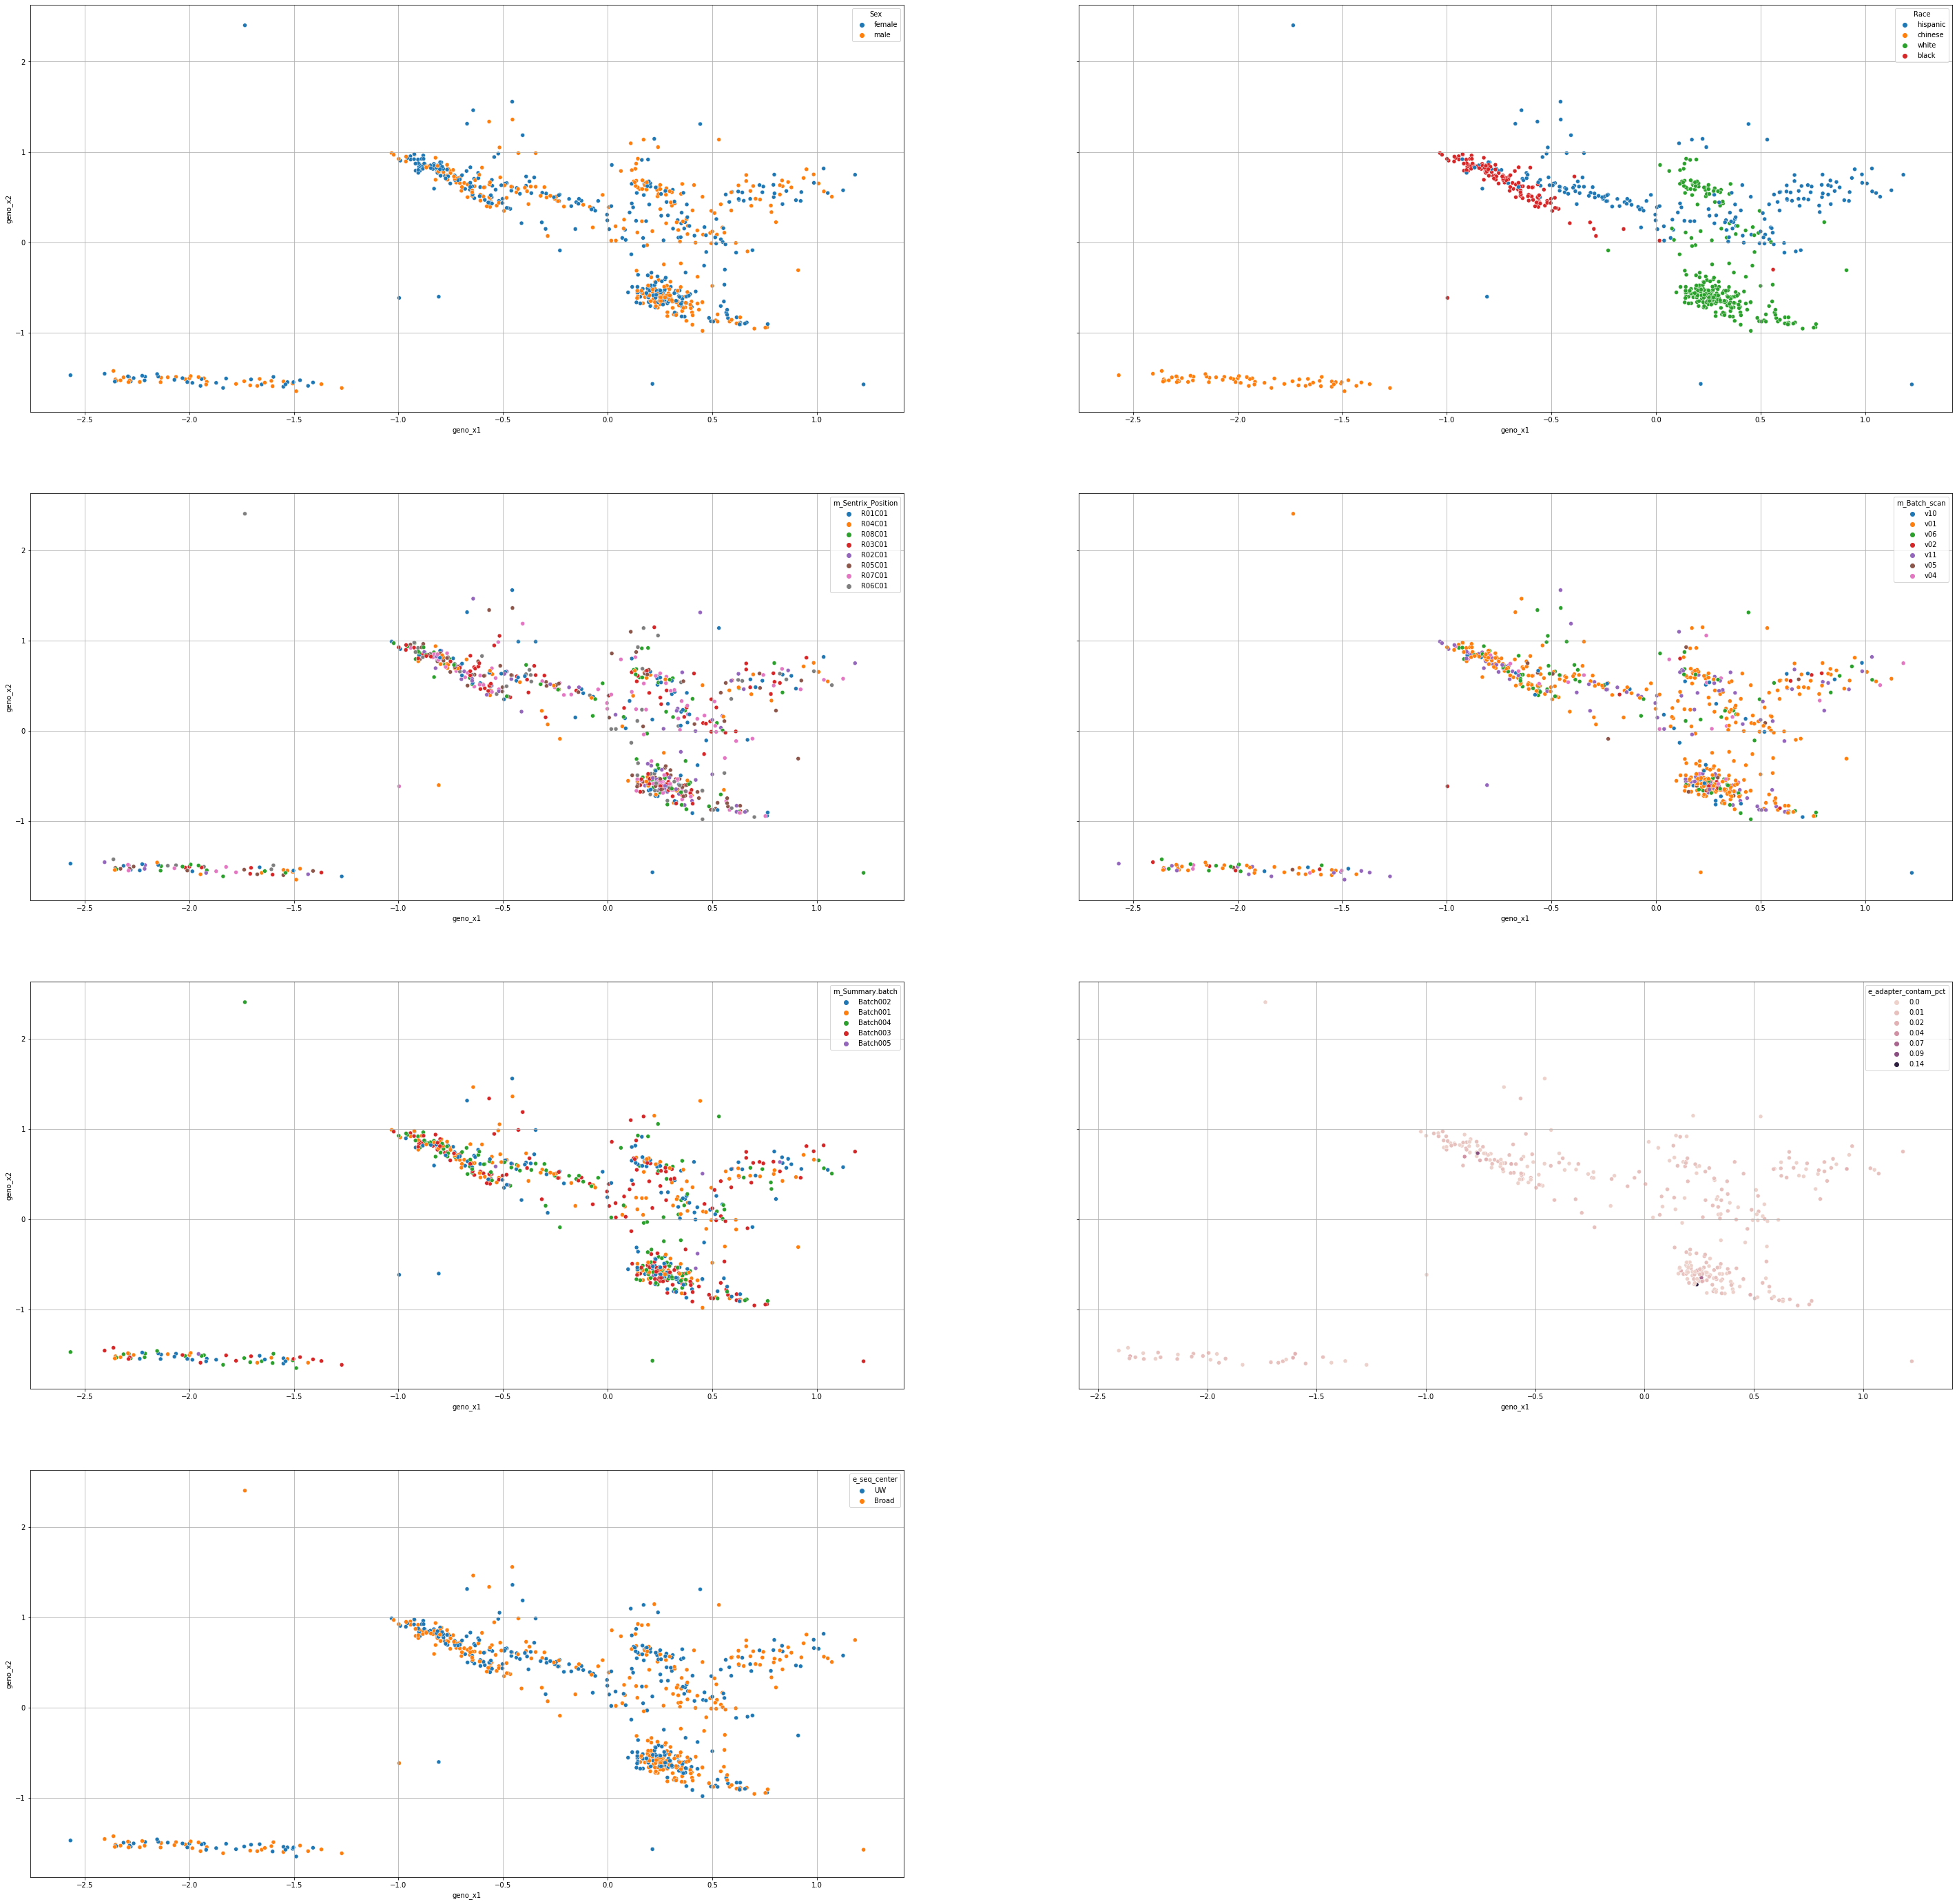

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(50, 50), sharey=True)
grid_enabled = True
if grid_enabled:
    for row in axes:
        for ax in row:
            ax.grid()

for i, col in enumerate(column_list):
    meta = meta_df[col].unique()
    sns.scatterplot(data=meta_df[['geno_x1', 'geno_x2', col]], x='geno_x1', y='geno_x2', hue=col, hue_order=meta, legend='full', ax=axes.flat[i])

fig.delaxes(axes.flat[-1])
plt.show()

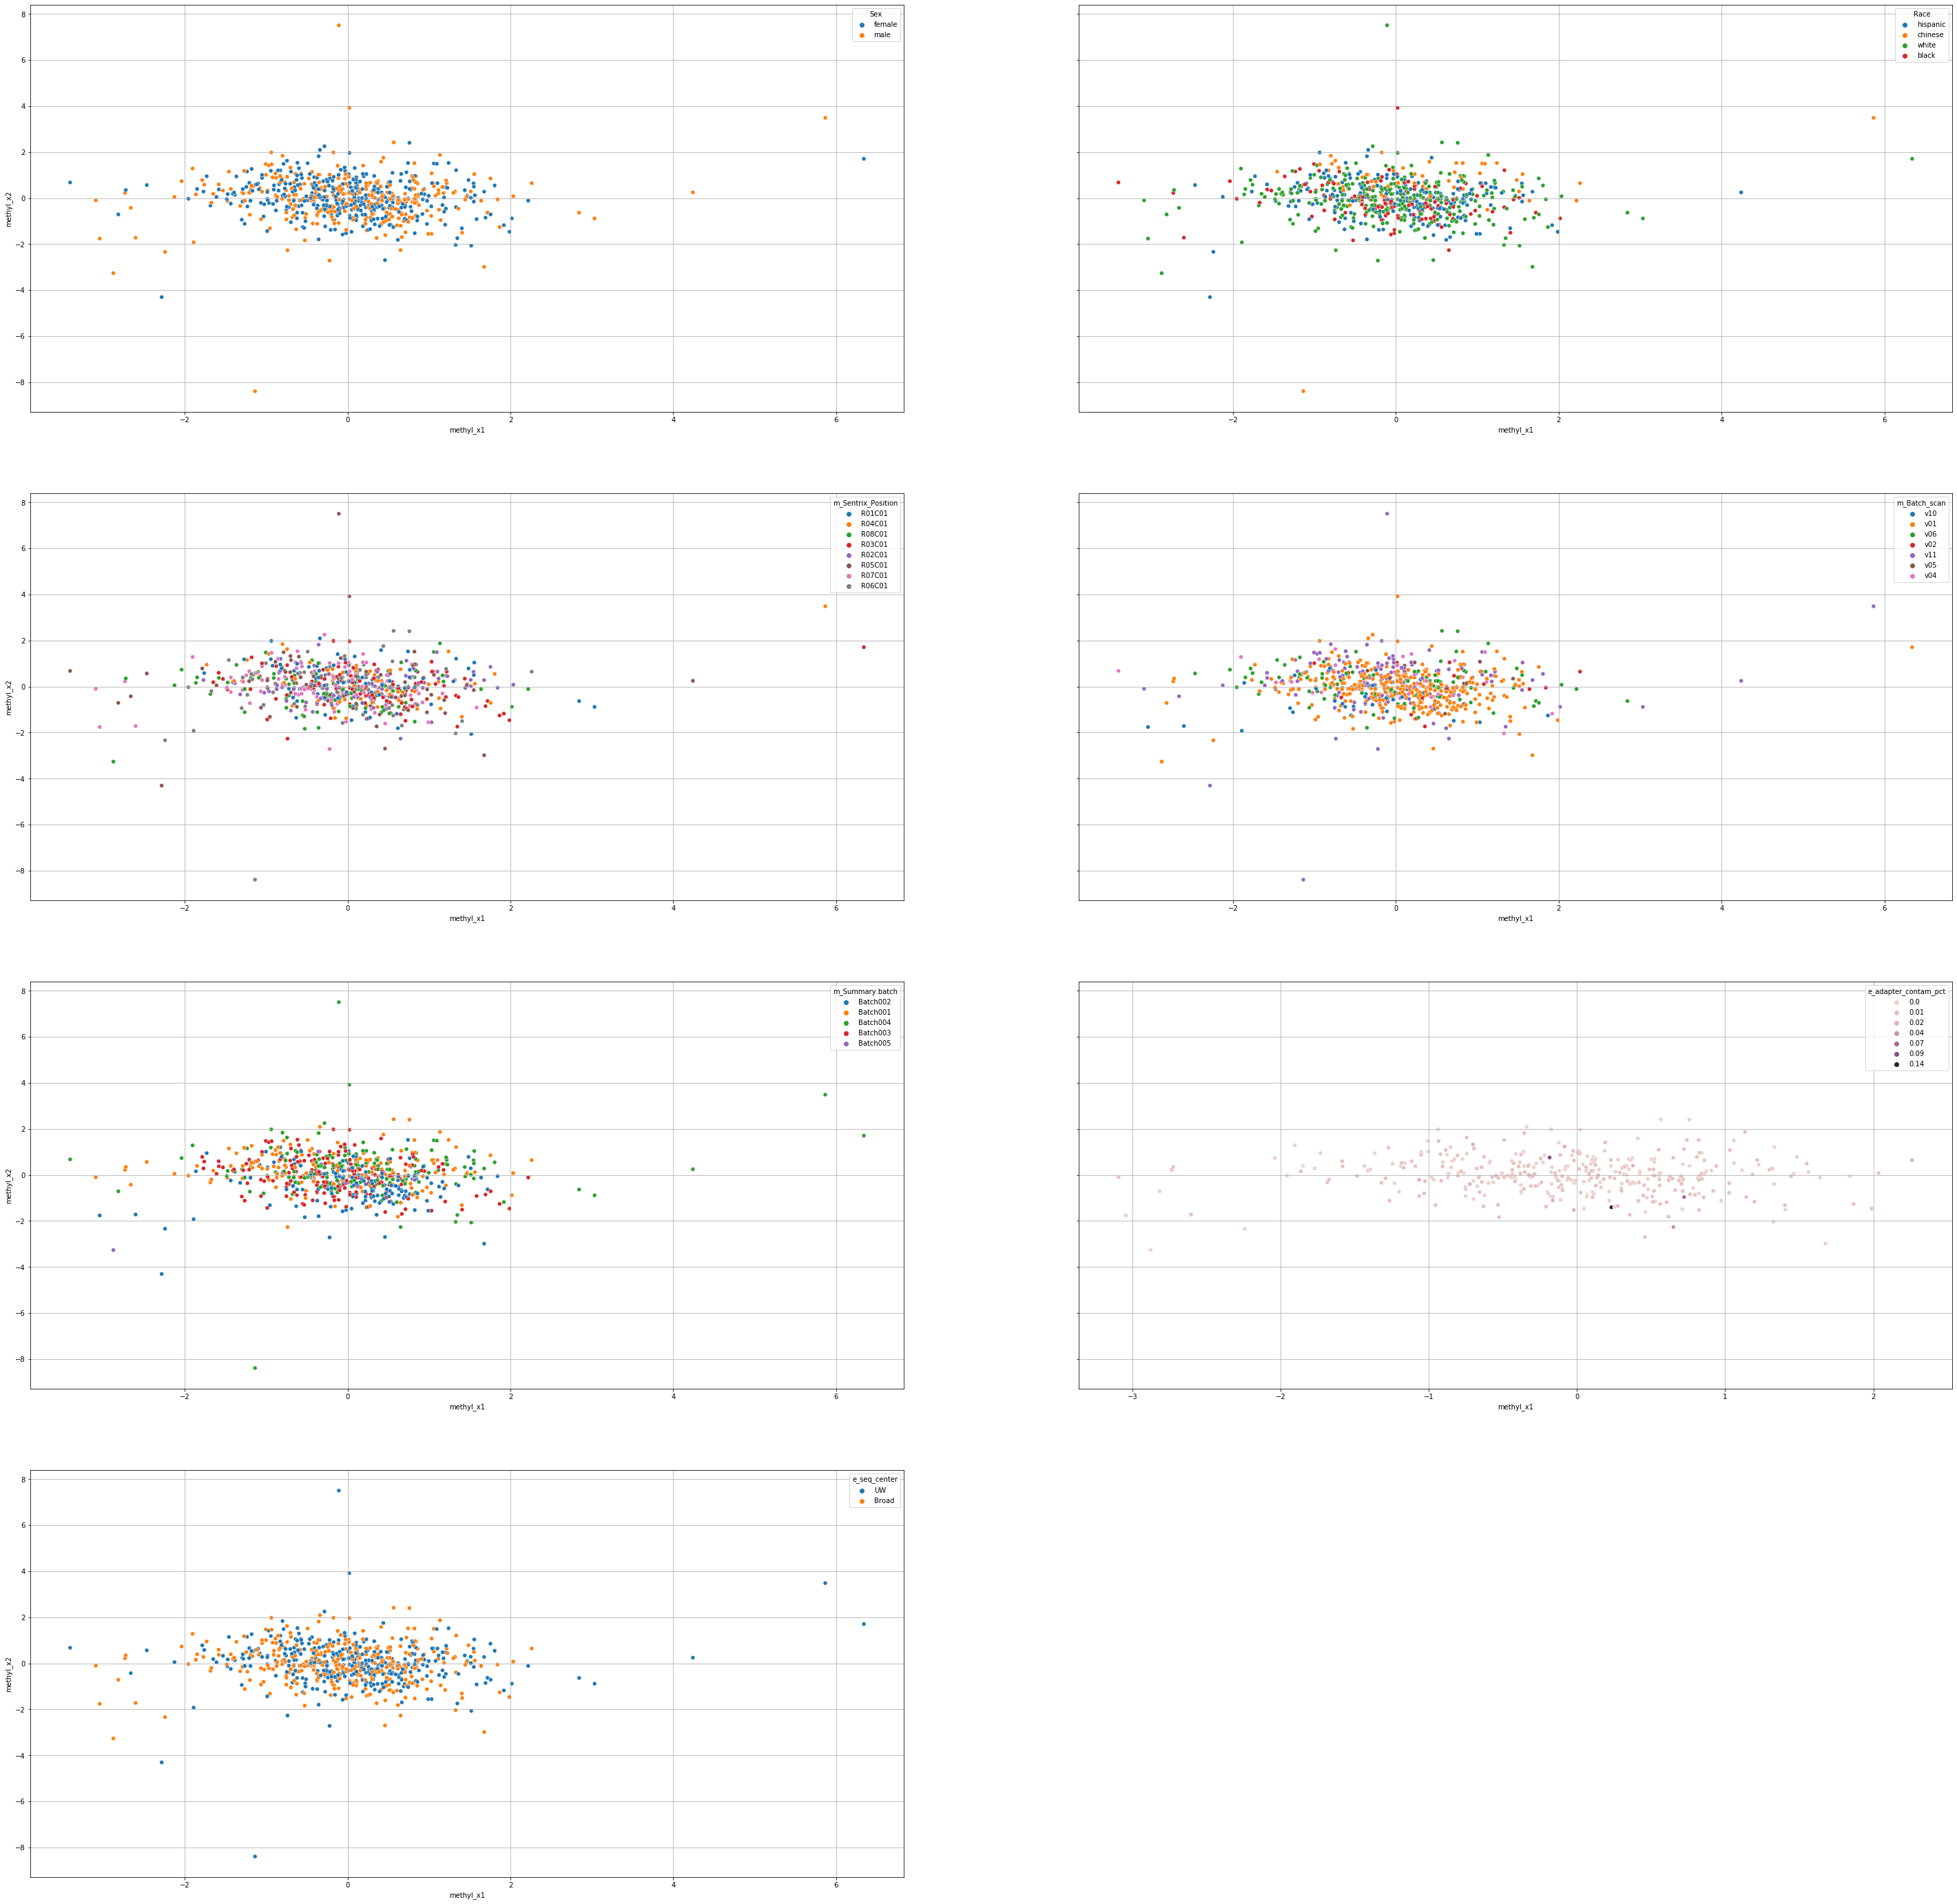

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(50, 50), sharey=True)
grid_enabled = True
if grid_enabled:
    for row in axes:
        for ax in row:
            ax.grid()

for i, col in enumerate(column_list):
    meta = meta_df[col].unique()
    sns.scatterplot(data=meta_df[['methyl_x1', 'methyl_x2', col]], x='methyl_x1', y='methyl_x2', hue=col, hue_order=meta, legend='full', ax=axes.flat[i])

fig.delaxes(axes.flat[-1])
plt.show()

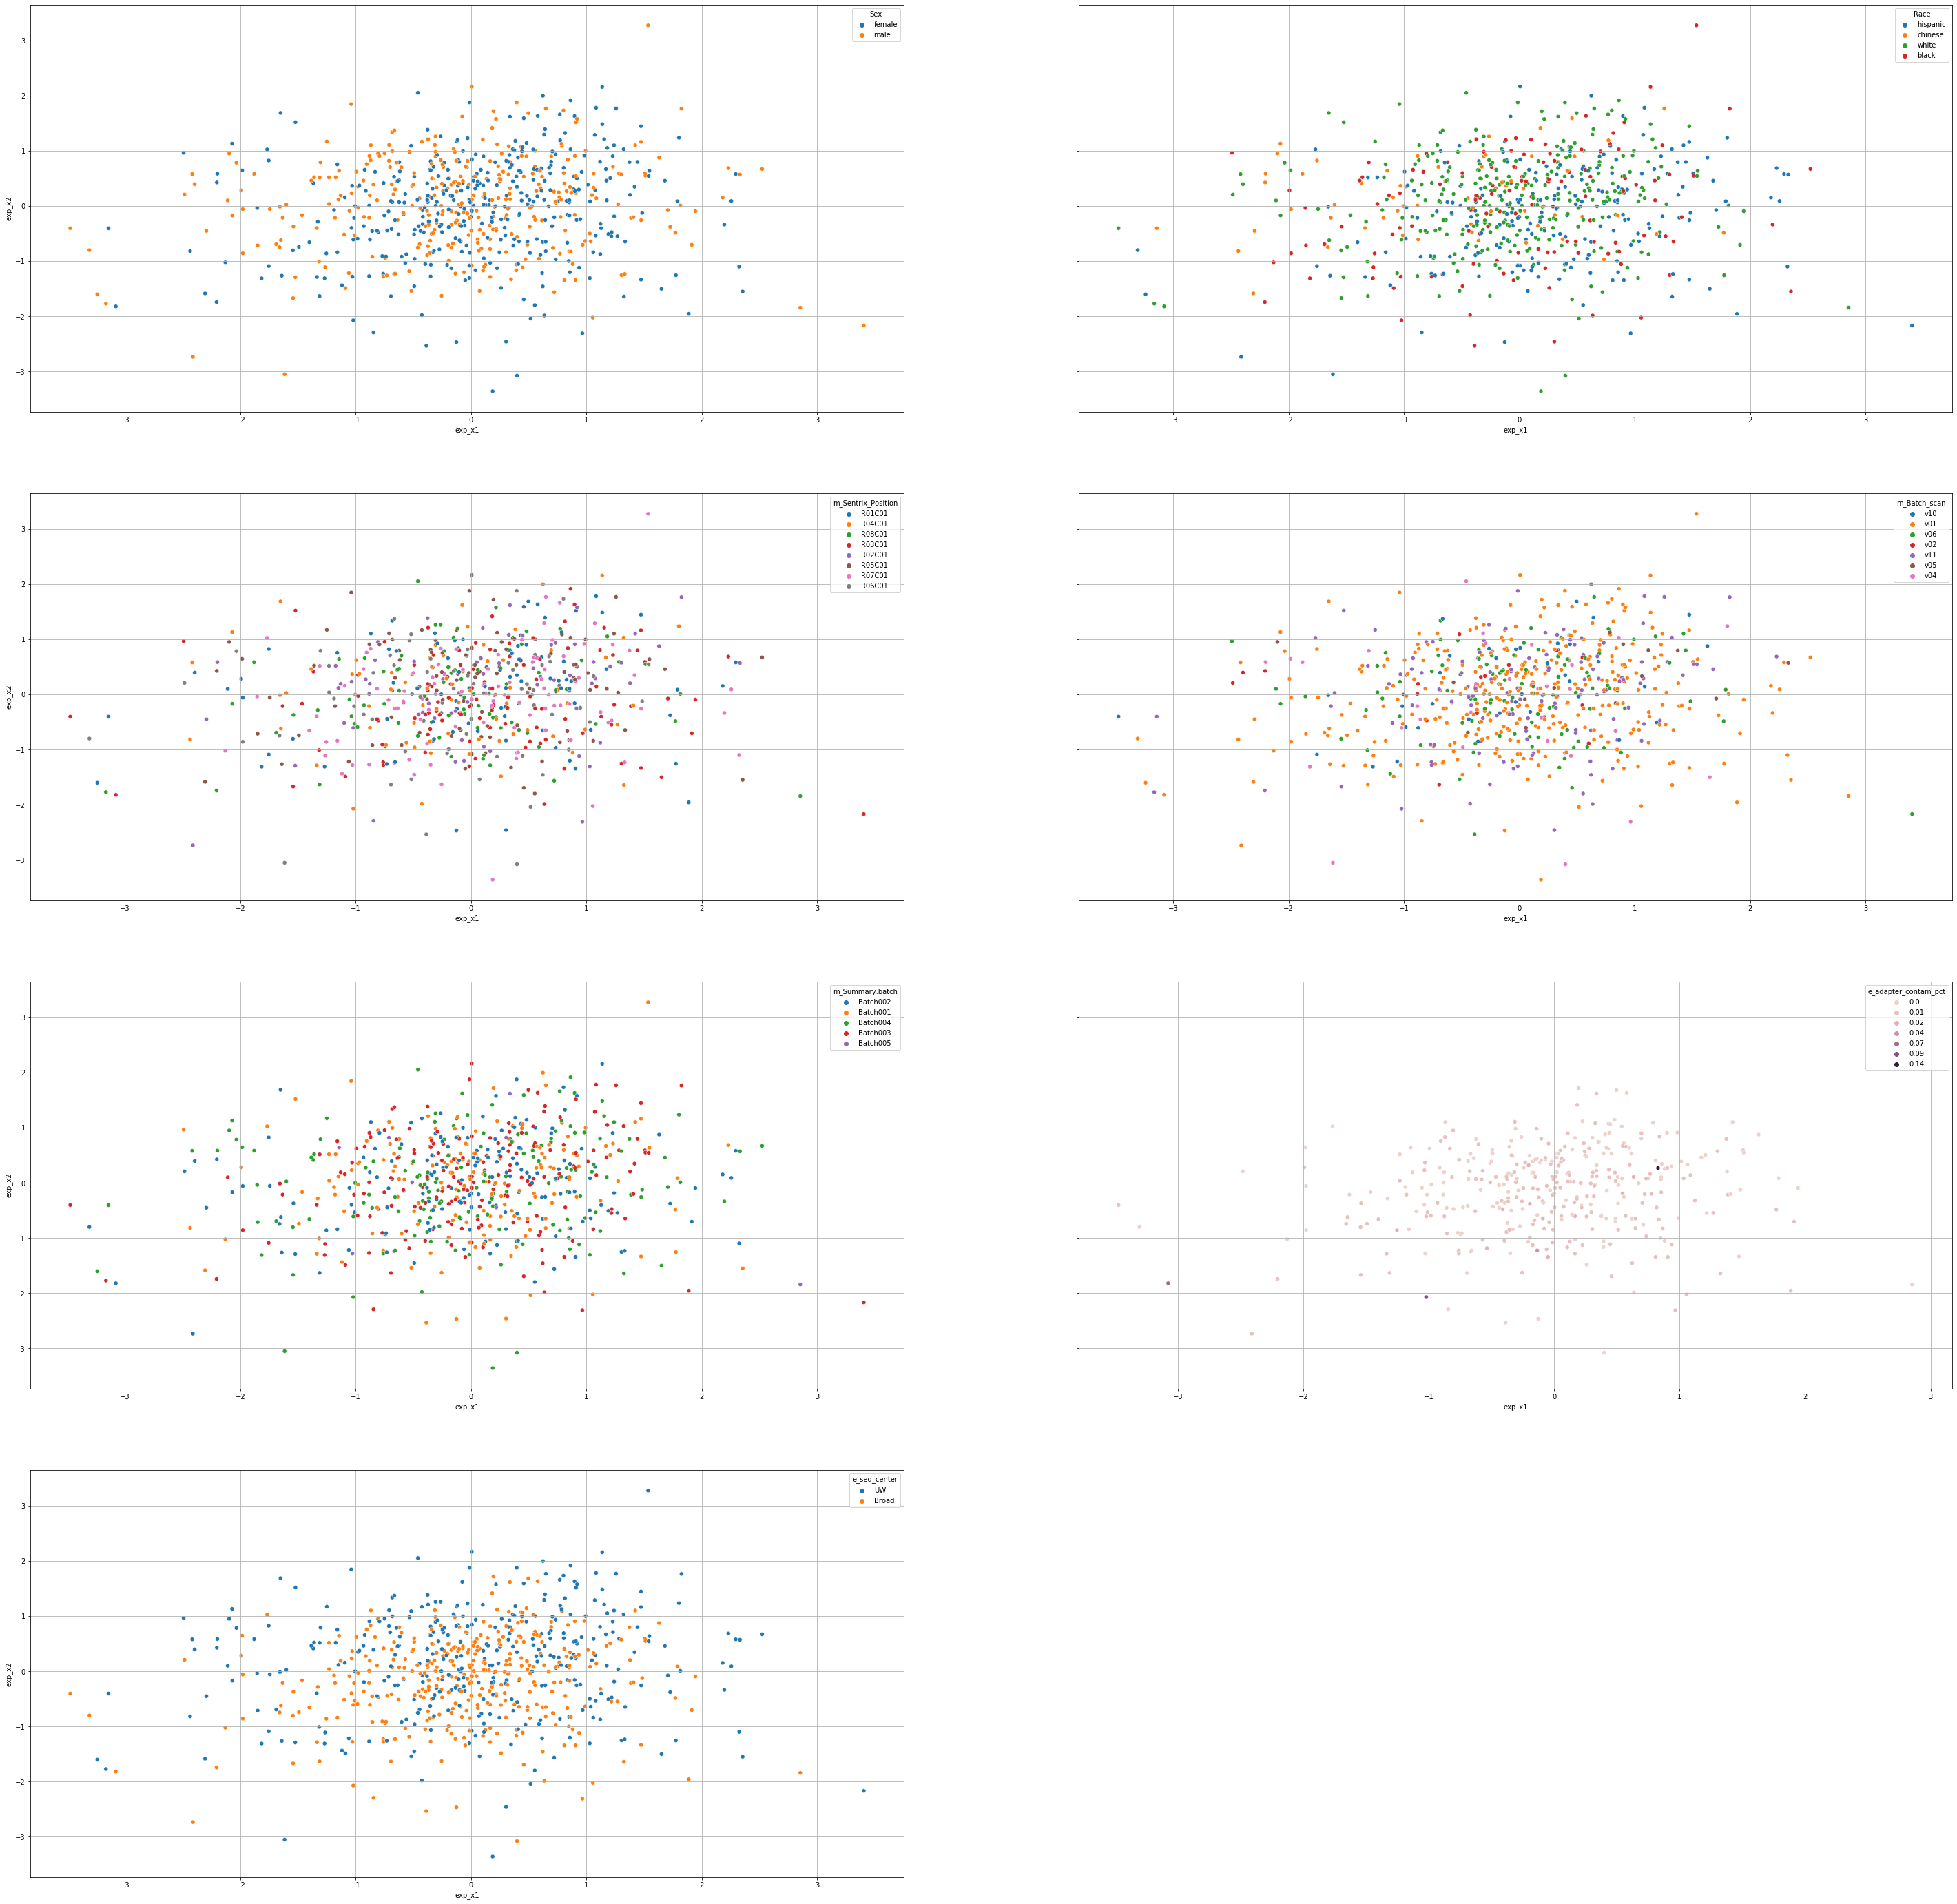

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(50, 50), sharey=True)
grid_enabled = True
if grid_enabled:
    for row in axes:
        for ax in row:
            ax.grid()

for i, col in enumerate(column_list):
    meta = meta_df[col].unique()
    sns.scatterplot(data=meta_df[['exp_x1', 'exp_x2', col]], x='exp_x1', y='exp_x2', hue=col, hue_order=meta, legend='full', ax=axes.flat[i])

fig.delaxes(axes.flat[-1])
plt.show()

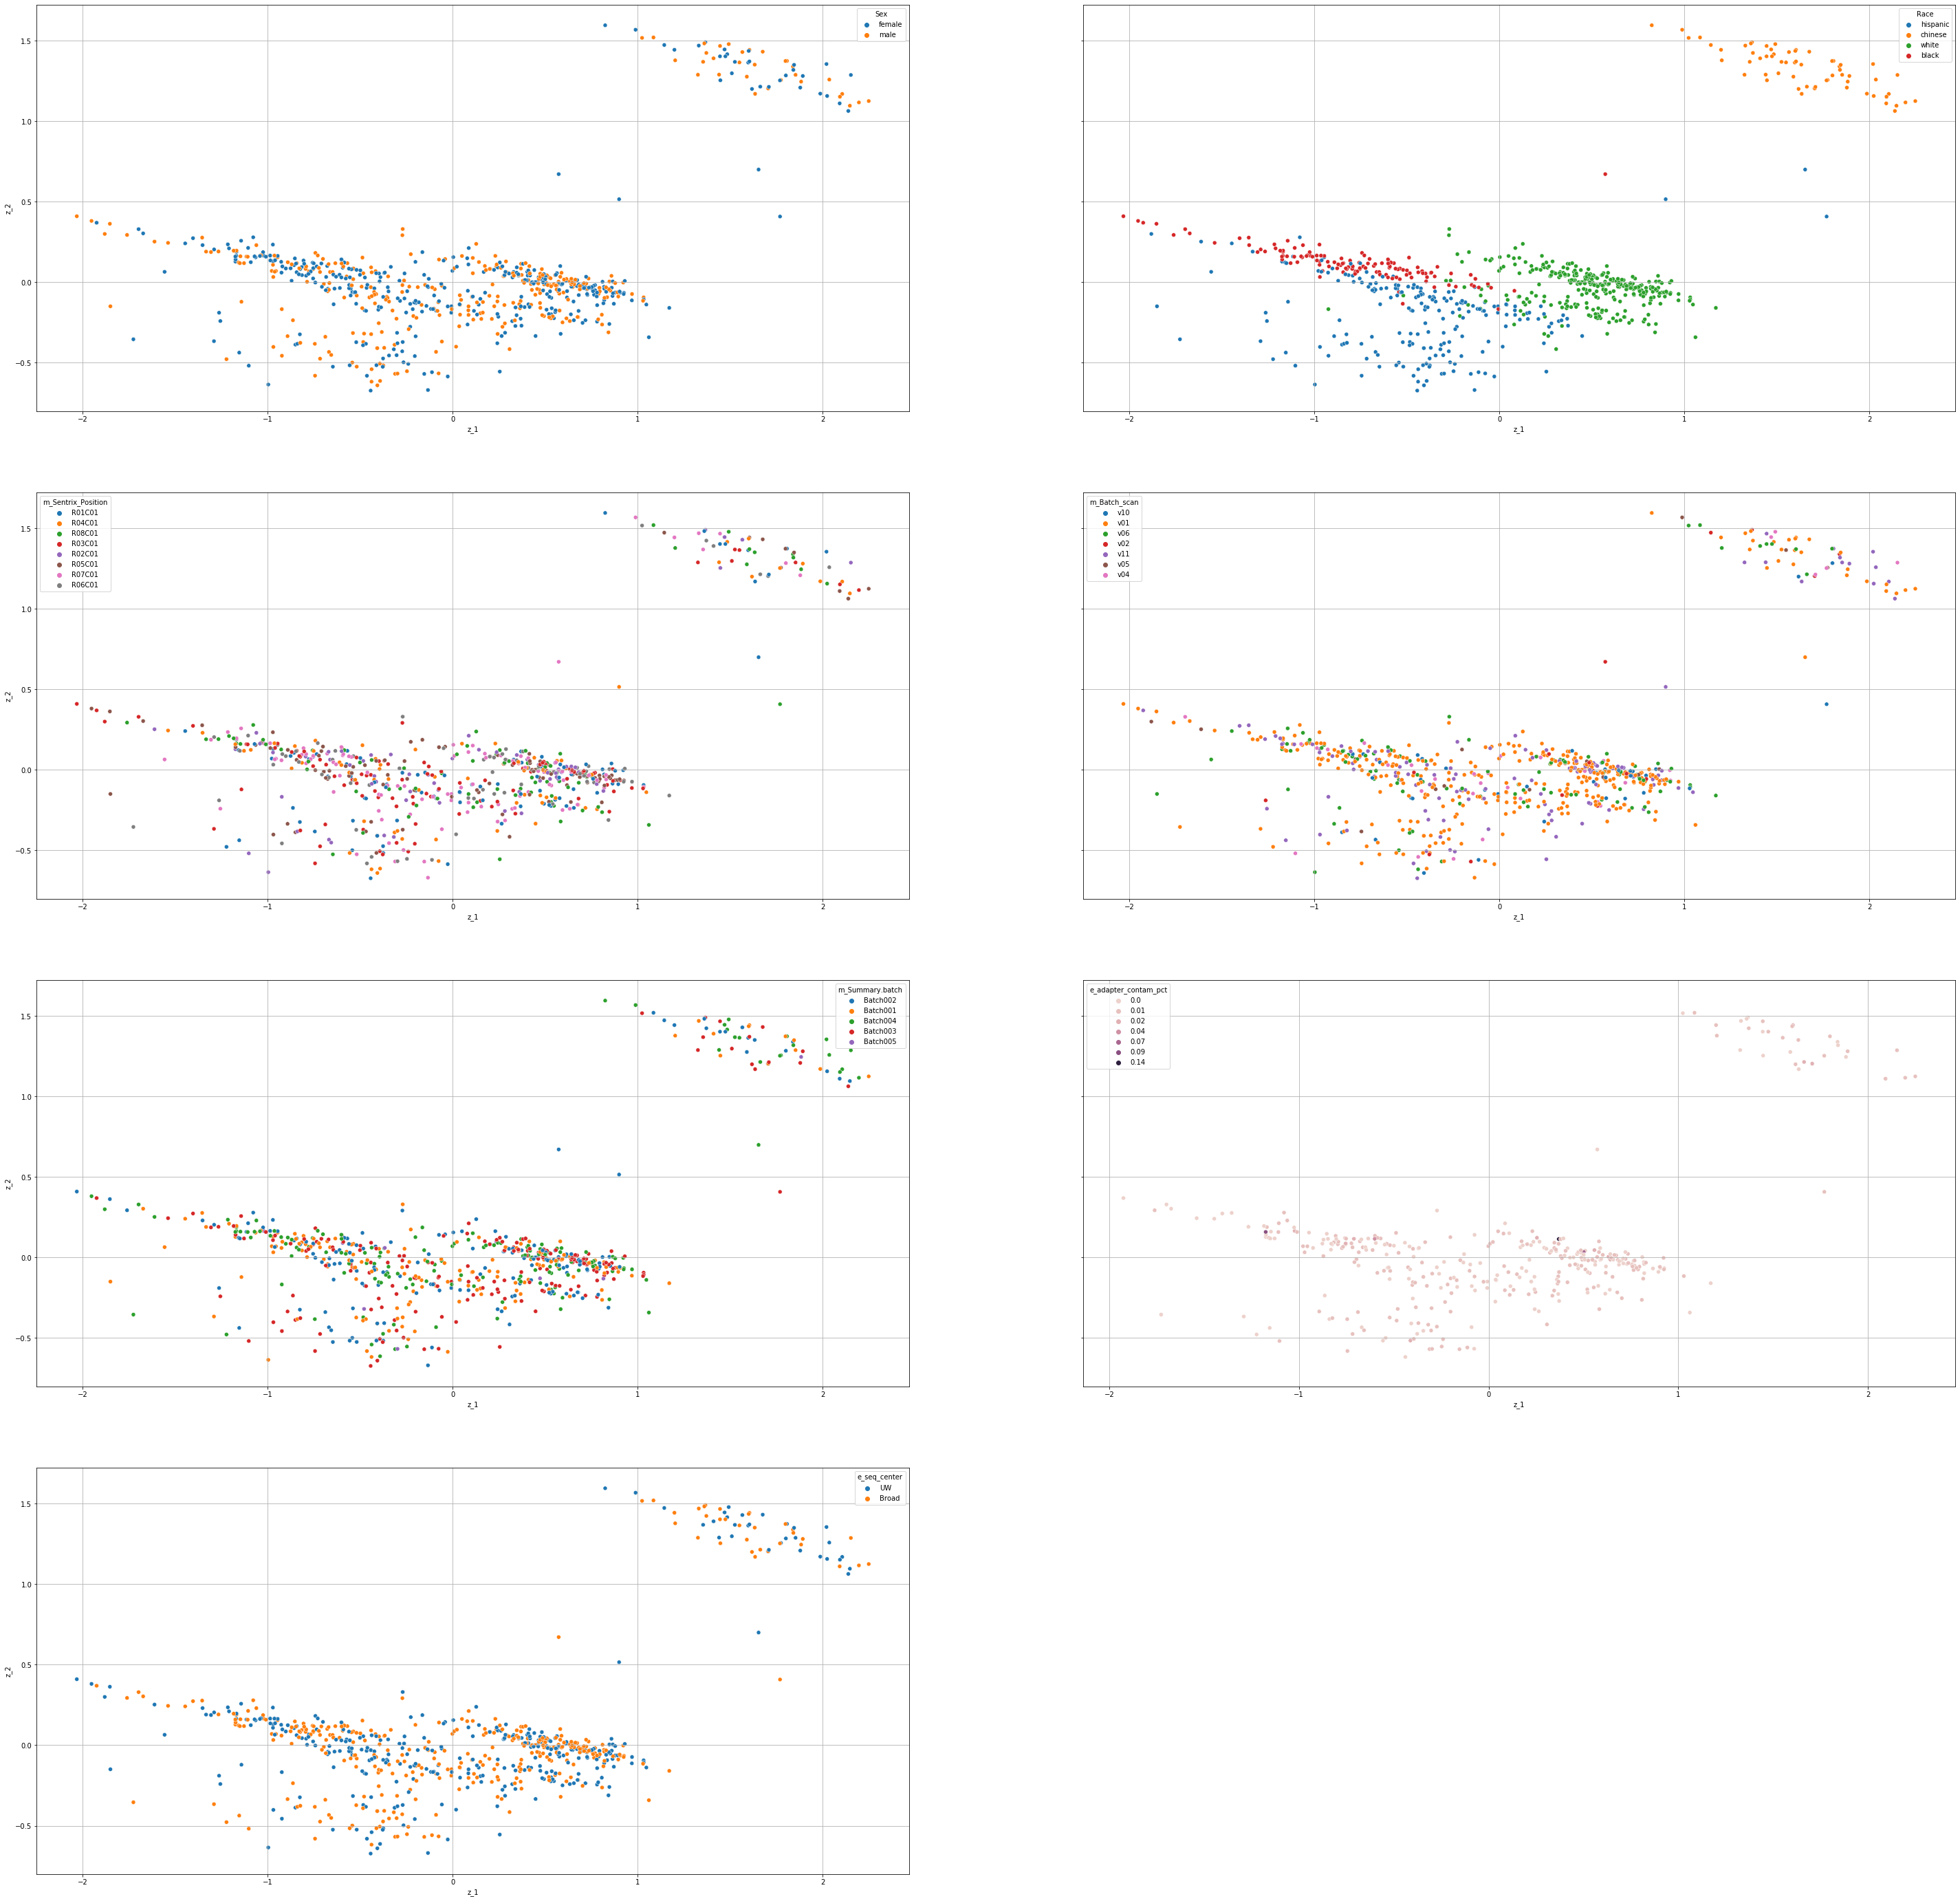

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(50, 50), sharey=True)
grid_enabled = True
if grid_enabled:
    for row in axes:
        for ax in row:
            ax.grid()

for i, col in enumerate(column_list):
    meta = meta_df[col].unique()
    sns.scatterplot(data=meta_df[['z_1', 'z_2', col]], x='z_1', y='z_2', hue=col, hue_order=meta, legend='full', ax=axes.flat[i])

fig.delaxes(axes.flat[-1])
plt.show()